In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/driver/')

Mounted at /content/driver/


In [3]:
dataset_path = ('/content/driver/MyDrive/dataset/testbed_flat_tms.csv')
df = pd.read_csv(dataset_path)

In [4]:
od_number = 51
dataset = df.iloc[:, od_number]
dataset = dataset.astype('float32')
dataset = dataset.values
dataset = np.reshape(dataset,(-1,1))
dataset

array([[3426.],
       [9795.],
       [8665.],
       ...,
       [3146.],
       [3940.],
       [2678.]], dtype=float32)

In [5]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
	    a = dataset[i:(i+look_back), 0]
	    dataX.append(a)
	    dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print("train_data_size: " + str(trainX.shape[0]), " test_data_size: " + str(testX.shape[0]))

train_data_size: 4994  test_data_size: 1241


In [6]:

vanilla_lstm = Sequential()
vanilla_lstm.add(LSTM(100, input_dim=look_back, activation="relu"))
vanilla_lstm.add(Dense(1))
vanilla_lstm.compile(loss='mean_squared_error', optimizer='adam')

vanilla_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               44400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 44,501
Trainable params: 44,501
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Khởi tạo mô hình
model = Sequential()

# Thêm lớp ẩn với 32 nơ-ron và hàm kích hoạt relu
model.add(Dense(32, activation='relu', input_shape=(1,look_back)))

# Thêm lớp đầu ra với 1 nơ-ron và hàm kích hoạt sigmoid (cho bài toán nhị phân)
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1, 32)             352       
                                                                 
 dense_2 (Dense)             (None, 1, 1)              33        
                                                                 
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


In [8]:

# Khởi tạo mô hình MLP
model_MLP = Sequential()

# Thêm lớp ẩn đầu tiên với 100 nơ-ron và hàm kích hoạt ReLU
model_MLP.add(Dense(100, activation='relu', input_shape=(1,look_back)))

# Thêm lớp ẩn thứ hai với 50 nơ-ron và hàm kích hoạt ReLU
model_MLP.add(Dense(50, activation='relu'))

# Thêm lớp đầu ra với 1 nơ-ron và hàm kích hoạt tùy chọn (ví dụ: sigmoid cho bài toán nhị phân)
model_MLP.add(Dense(1))

# Biên dịch mô hình với hàm mất mát và thuật toán tối ưu
model_MLP.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

model_MLP.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1, 100)            1100      
                                                                 
 dense_4 (Dense)             (None, 1, 50)             5050      
                                                                 
 dense_5 (Dense)             (None, 1, 1)              51        
                                                                 
Total params: 6,201
Trainable params: 6,201
Non-trainable params: 0
_________________________________________________________________


In [9]:
vanilla_lstm.fit(trainX, trainY, epochs=200, batch_size=32, verbose=2,validation_split=0.3)

Epoch 1/200
110/110 - 7s - loss: 0.1004 - val_loss: 0.0411 - 7s/epoch - 61ms/step
Epoch 2/200
110/110 - 1s - loss: 0.0319 - val_loss: 0.0275 - 595ms/epoch - 5ms/step
Epoch 3/200
110/110 - 1s - loss: 0.0267 - val_loss: 0.0253 - 880ms/epoch - 8ms/step
Epoch 4/200
110/110 - 1s - loss: 0.0252 - val_loss: 0.0237 - 1s/epoch - 9ms/step
Epoch 5/200
110/110 - 1s - loss: 0.0237 - val_loss: 0.0221 - 1s/epoch - 9ms/step
Epoch 6/200
110/110 - 1s - loss: 0.0222 - val_loss: 0.0216 - 1s/epoch - 9ms/step
Epoch 7/200
110/110 - 1s - loss: 0.0209 - val_loss: 0.0191 - 631ms/epoch - 6ms/step
Epoch 8/200
110/110 - 1s - loss: 0.0189 - val_loss: 0.0175 - 646ms/epoch - 6ms/step
Epoch 9/200
110/110 - 1s - loss: 0.0177 - val_loss: 0.0165 - 653ms/epoch - 6ms/step
Epoch 10/200
110/110 - 1s - loss: 0.0167 - val_loss: 0.0156 - 591ms/epoch - 5ms/step
Epoch 11/200
110/110 - 1s - loss: 0.0160 - val_loss: 0.0146 - 586ms/epoch - 5ms/step
Epoch 12/200
110/110 - 1s - loss: 0.0152 - val_loss: 0.0142 - 606ms/epoch - 6ms/step


In [19]:
model.fit(trainX, trainY, epochs=200, batch_size=32, verbose=2, validation_split=0.3)

Epoch 1/200
110/110 - 1s - loss: 0.0711 - val_loss: 0.0706 - 704ms/epoch - 6ms/step
Epoch 2/200
110/110 - 1s - loss: 0.0709 - val_loss: 0.0707 - 789ms/epoch - 7ms/step
Epoch 3/200
110/110 - 0s - loss: 0.0709 - val_loss: 0.0706 - 467ms/epoch - 4ms/step
Epoch 4/200
110/110 - 0s - loss: 0.0710 - val_loss: 0.0717 - 405ms/epoch - 4ms/step
Epoch 5/200
110/110 - 0s - loss: 0.0709 - val_loss: 0.0706 - 421ms/epoch - 4ms/step
Epoch 6/200
110/110 - 0s - loss: 0.0711 - val_loss: 0.0706 - 458ms/epoch - 4ms/step
Epoch 7/200
110/110 - 0s - loss: 0.0710 - val_loss: 0.0707 - 465ms/epoch - 4ms/step
Epoch 8/200
110/110 - 0s - loss: 0.0713 - val_loss: 0.0706 - 396ms/epoch - 4ms/step
Epoch 9/200
110/110 - 0s - loss: 0.0710 - val_loss: 0.0707 - 406ms/epoch - 4ms/step
Epoch 10/200
110/110 - 0s - loss: 0.0710 - val_loss: 0.0706 - 406ms/epoch - 4ms/step
Epoch 11/200
110/110 - 0s - loss: 0.0710 - val_loss: 0.0706 - 387ms/epoch - 4ms/step
Epoch 12/200
110/110 - 0s - loss: 0.0711 - val_loss: 0.0706 - 418ms/epoch 

In [11]:
model_MLP.fit(trainX, trainY, epochs=200, batch_size=32, verbose=2,validation_split=0.3)

Epoch 1/200
110/110 - 2s - loss: 0.0762 - accuracy: 3.5765e-05 - val_loss: 0.0710 - val_accuracy: 0.0000e+00 - 2s/epoch - 19ms/step
Epoch 2/200
110/110 - 0s - loss: 0.0717 - accuracy: 2.6824e-05 - val_loss: 0.0717 - val_accuracy: 0.0000e+00 - 498ms/epoch - 5ms/step
Epoch 3/200
110/110 - 0s - loss: 0.0723 - accuracy: 5.3648e-05 - val_loss: 0.0712 - val_accuracy: 0.0000e+00 - 494ms/epoch - 4ms/step
Epoch 4/200
110/110 - 1s - loss: 0.0734 - accuracy: 0.0000e+00 - val_loss: 0.0709 - val_accuracy: 0.0000e+00 - 512ms/epoch - 5ms/step
Epoch 5/200
110/110 - 1s - loss: 0.0717 - accuracy: 2.3247e-04 - val_loss: 0.0716 - val_accuracy: 0.0000e+00 - 500ms/epoch - 5ms/step
Epoch 6/200
110/110 - 0s - loss: 0.0714 - accuracy: 4.4707e-05 - val_loss: 0.0707 - val_accuracy: 0.0000e+00 - 497ms/epoch - 5ms/step
Epoch 7/200
110/110 - 1s - loss: 0.0715 - accuracy: 0.0000e+00 - val_loss: 0.0728 - val_accuracy: 0.0000e+00 - 527ms/epoch - 5ms/step
Epoch 8/200
110/110 - 1s - loss: 0.0716 - accuracy: 1.5200e-04 -

In [12]:
vanilla_predict = vanilla_lstm.predict(testX)
vanilla_result = scaler.inverse_transform(vanilla_predict)

39/39 [==============================] - 0s 2ms/step


In [ ]:
model_predict = model.predict(testX)
model_predict = np.reshape(model_predict, (model_predict.shape[0], model_predict.shape[1]))
model_result = scaler.inverse_transform(model_predict)

39/39 [==============================] - 0s 2ms/step


In [14]:
mlp_predict = model_MLP.predict(testX)
mlp_predict = np.reshape(mlp_predict, (mlp_predict.shape[0], mlp_predict.shape[1]))
mlp_result = scaler.inverse_transform(mlp_predict)

39/39 [==============================] - 0s 2ms/step


In [15]:
true_testY = scaler.inverse_transform([testY])
true_testY = np.reshape(true_testY,(true_testY.shape[1],1))

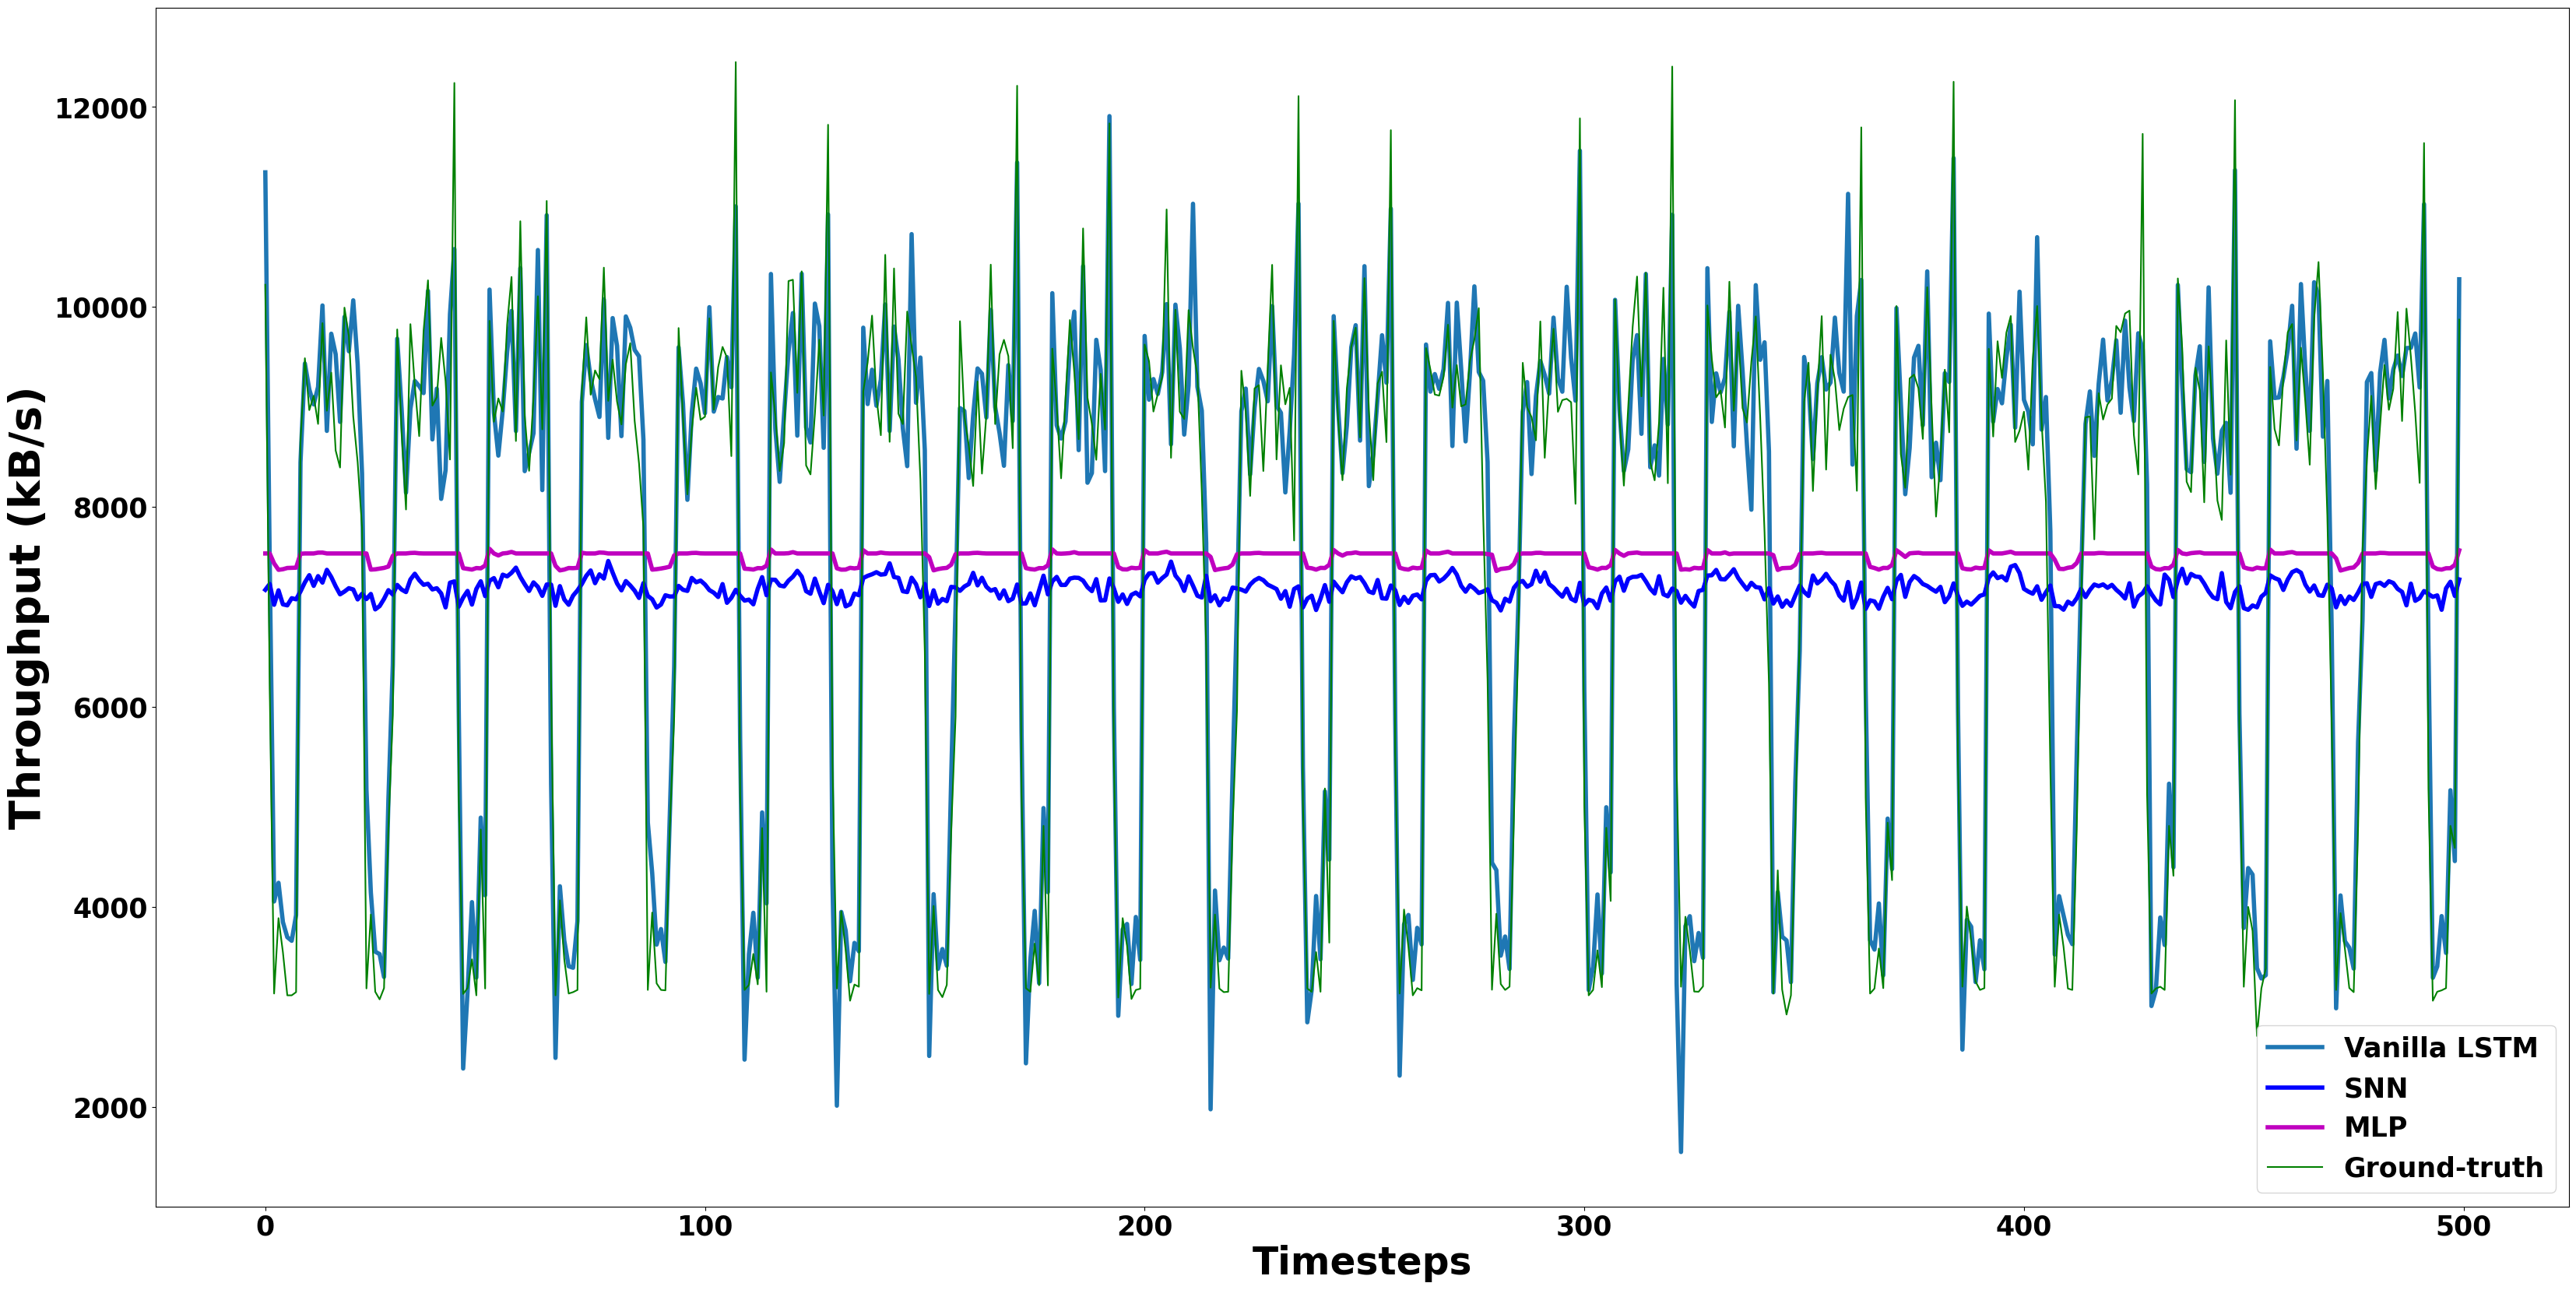

In [16]:
timesteps = 500
plt.rcParams["figure.figsize"] = (40,20)
plt.rcParams.update({'font.size': 25, 'font.weight' : 'bold'})
plt.plot(vanilla_result[0:timesteps], label = "Vanilla LSTM",linewidth=4)
plt.plot(model_result[0:timesteps], label = "SNN",linewidth=4, color='b')
plt.plot(mlp_result[0:timesteps], label = "MLP",linewidth=4, color='m')
plt.plot(true_testY[0:timesteps], label = "Ground-truth", color = 'g')
plt.xlabel('Timesteps', fontweight='bold', fontsize=35)
plt.ylabel('Throughput (kB/s)', fontweight='bold', fontsize = 40)
plt.legend()

In [17]:
vanil_temp = 0
snn_temp = 0
mlp_temp = 0

for i in range(len(testY)):
    vanil_temp += (testY[i] - vanilla_predict[i])**2
    snn_temp += (testY[i] - model_predict[i])**2
    mlp_temp += (testY[i] - mlp_predict[i])**2

v_rmse = math.sqrt(vanil_temp / len(testY))
b_rmse = math.sqrt(snn_temp / len(testY))
g_rmse = math.sqrt(mlp_temp / len(testY))

<BarContainer object of 3 artists>

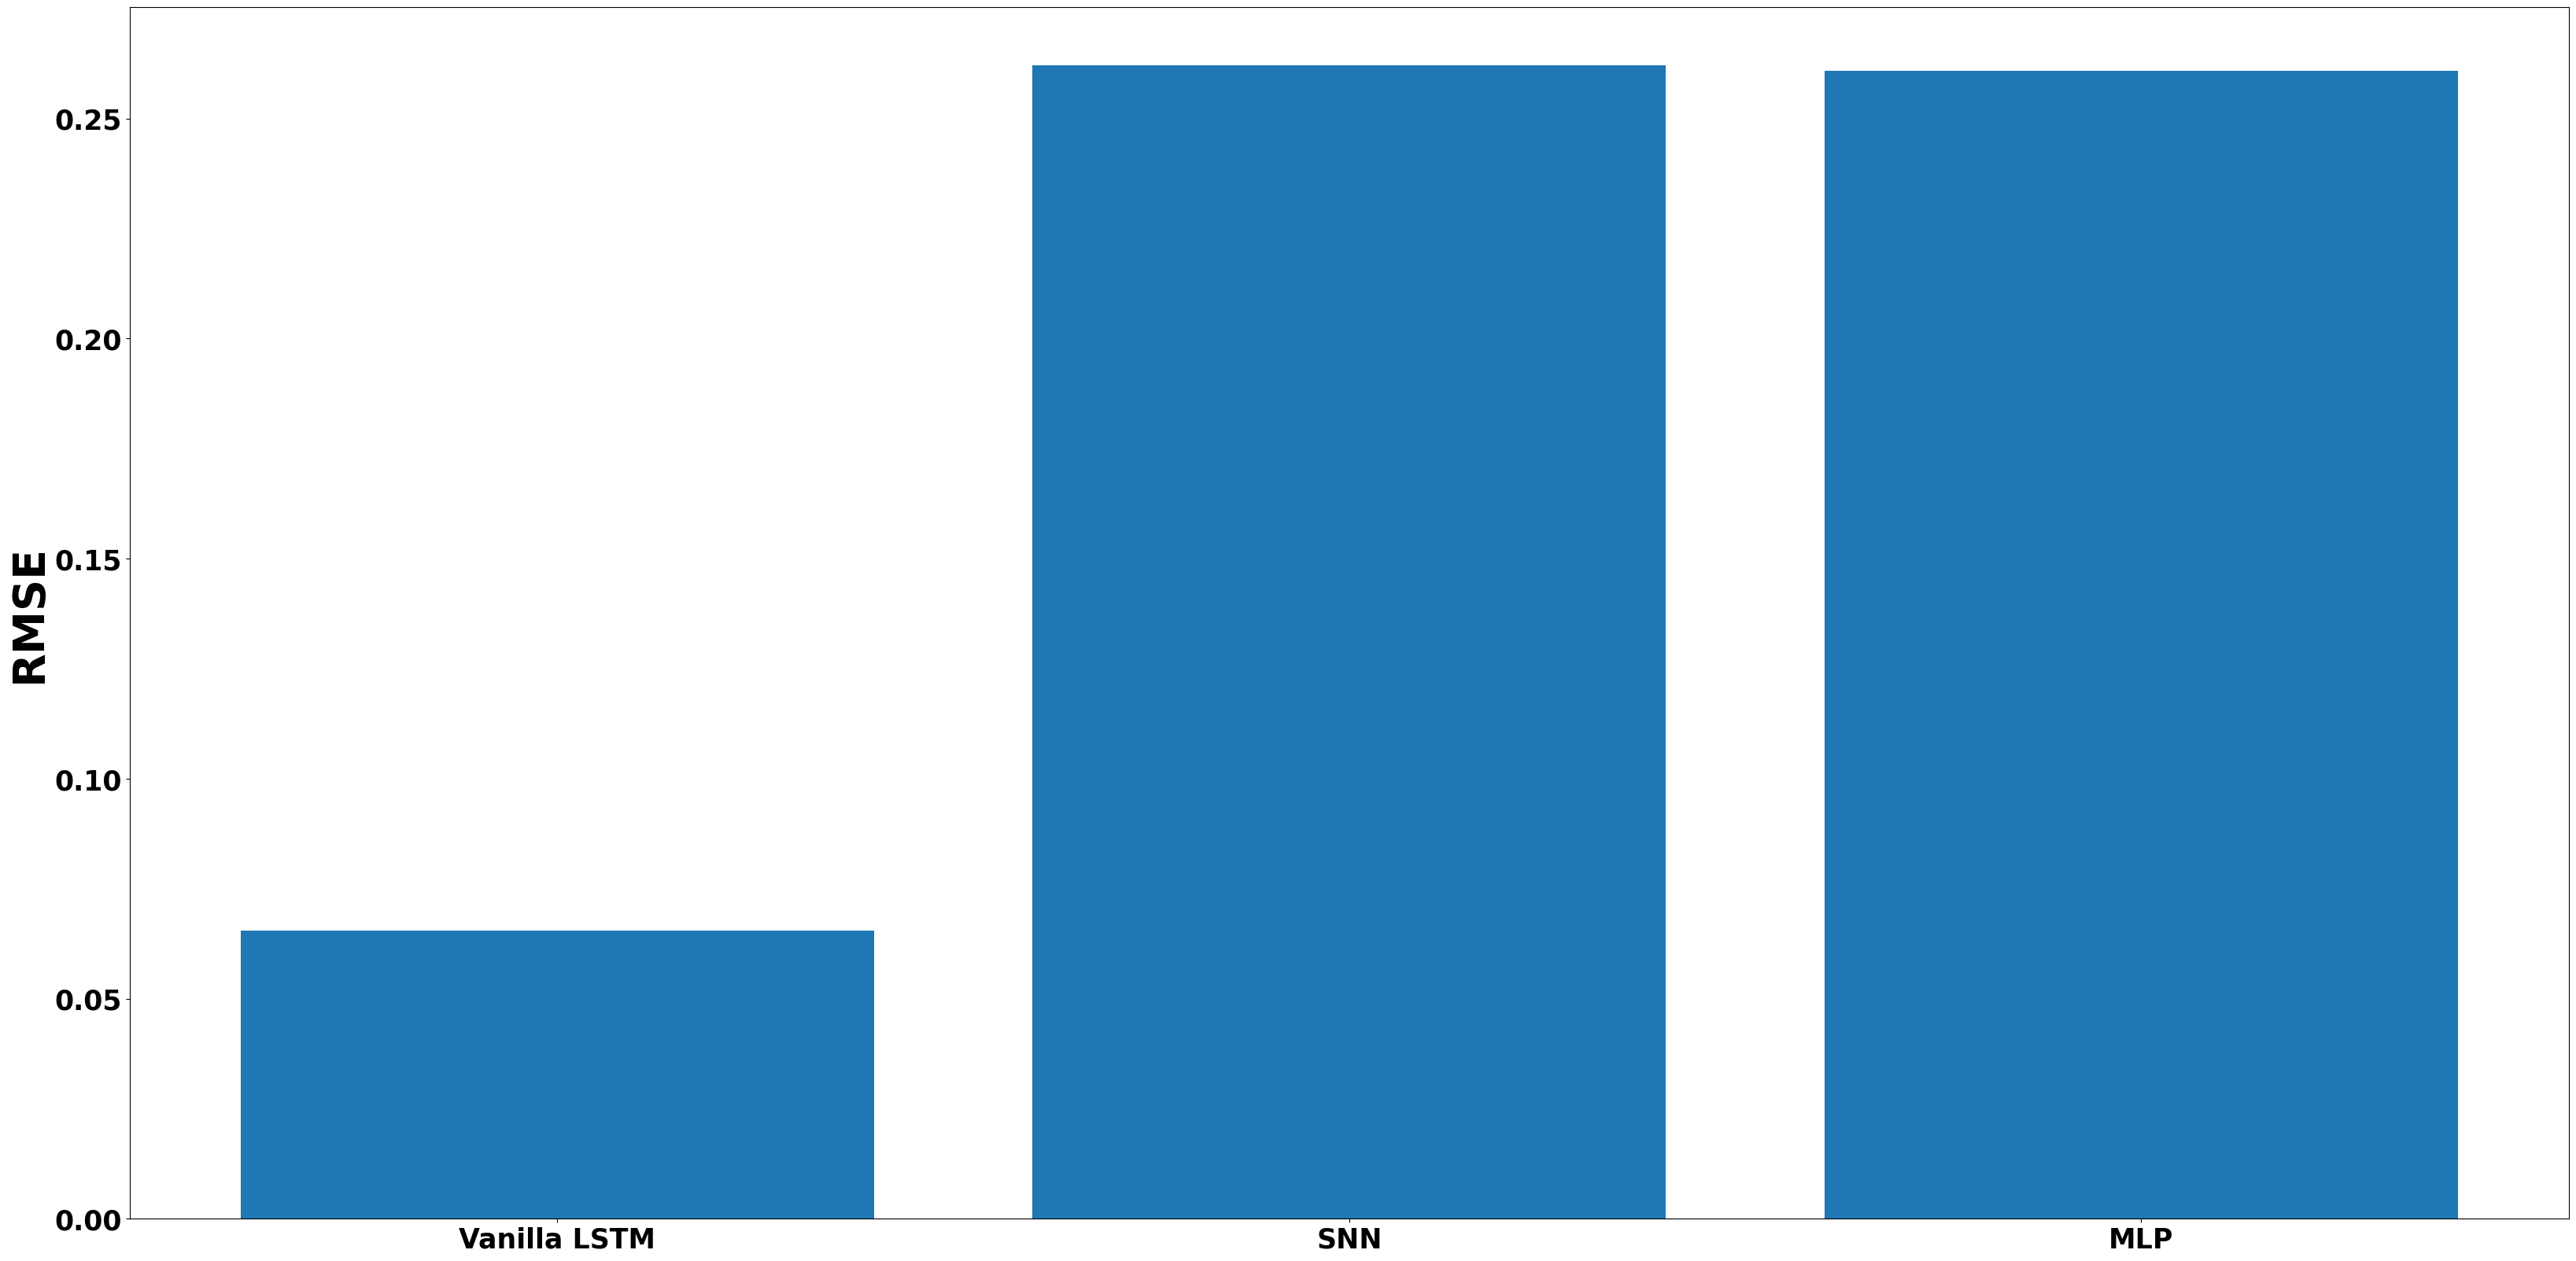

In [18]:
fig = plt.figure()
names = ['Vanilla LSTM', 'SNN', 'MLP']
values = [v_rmse,b_rmse,g_rmse]
plt.ylabel('RMSE', fontweight='bold',fontsize= 40)
# plt.ylim([0.006,0.0125])
plt.bar(names,values) 